# Plot FVCOM netcdf files
**Author: Jun Sasaki Coded on 2024-12-26 Updated on 2024-12-29**<br>
Checking input netcdf files by creating a new xfvcom.py, which should be published as a package.

In [1]:
import xarray as xr
import os
from xfvcom import FvcomDataLoader, FvcomAnalyzer, FvcomPlotConfig, FvcomPlotter
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from math import ceil

## Plot output netcdf

In [2]:
indir = "~/Github/TB-FVCOM/goto2023/output"
ncfiles = ["TokyoBay18_r16_crossed_0001.nc"]
index_ncfiles=0
ofc = FvcomDataLoader(base_path=indir, ncfile=ncfiles[index_ncfiles], time_tolerance=5)
ofc.ds

Dataset loaded successfully from /home/teem/Github/TB-FVCOM/goto2023/output/TokyoBay18_r16_crossed_0001.nc


<xarray.Dataset> Size: 1GB
Dimensions:    (nele: 5645, node: 3210, siglay: 30, siglev: 31, three: 3,
                time: 72, maxnode: 11, maxelem: 9, four: 4, dim_0: 5645,
                dim_1: 3)
Coordinates:
    x          (node) float64 26kB ...
    y          (node) float64 26kB ...
    lon        (node) float64 26kB 139.8 139.8 139.8 139.8 ... 139.8 139.9 139.8
    lat        (node) float64 26kB 35.65 35.65 35.65 35.65 ... 34.99 34.99 34.99
    lonc       (nele) float64 45kB 139.8 139.8 139.8 139.8 ... 139.9 139.8 139.9
    latc       (nele) float64 45kB 35.65 35.65 35.65 35.65 ... 35.0 34.99 34.99
    siglay     (siglay, node) float64 770kB ...
    siglev     (siglev, node) float64 796kB ...
  * time       (time) datetime64[ns] 576B 2020-01-01T01:00:00 ... 2020-01-12T...
Dimensions without coordinates: nele, node, three, maxnode, maxelem, four,
                                dim_0, dim_1
Data variables: (12/41)
    nprocs     int32 4B ...
    partition  (nele) int32 23kB ...
    xc         (nele) float64 45kB ...
    yc         (nele) float64 45kB ...
    h          (node) float64 26kB ...
    nv         (three, nele) int32 68kB ...
    ...         ...
    q2l        (time, siglev, node) float64 57MB ...
    l          (time, siglev, node) float64 57MB ...
    z          (time, siglay, node) float64 55MB -0.0719 -0.0666 ... -3.88
    z_dfs      (time, siglay, node) float64 55MB 0.07187 0.06657 ... 3.749 3.737
    nv_zero    (dim_0, dim_1) int32 68kB 1 2 0 0 2 ... 3207 3206 3209 3206 3208
    nv_ccw     (nele, three) int32 68kB 0 2 1 3 2 0 ... 3207 3209 3208 3206 3209
Attributes: (12/14)
    title:                       TokyoBay18_r16_crossed
    institution:                 School for Marine Science and Technology
    source:                      FVCOM_4.4.7
    history:                     model started at: 20/11/2024   18:52
    references:                  http://fvcom.smast.umassd.edu, https://githu...
    Conventions:                 CF-1.0
    ...                          ...
    Tidal_Forcing:               Tidal Forcing Time Series Title: Model surfa...
    River_Forcing:               THERE ARE 22 RIVERS IN THIS MODEL.\nRIVER IN...
    GroundWater_Forcing:         GROUND WATER FORCING IS OFF!
    Surface_Heat_Forcing:        FVCOM variable surface heat forcing file:\nF...
    Surface_Wind_Forcing:        FVCOM variable surface Wind forcing:\nFILE N...
    Surface_PrecipEvap_Forcing:  SURFACE PRECIPITATION FORCING IS OFF

Switching to linear scale.


<Axes: title={'center': 'Time Series of viscofm (nele=1, siglay=0)'}, xlabel='Time', ylabel='viscofm'>

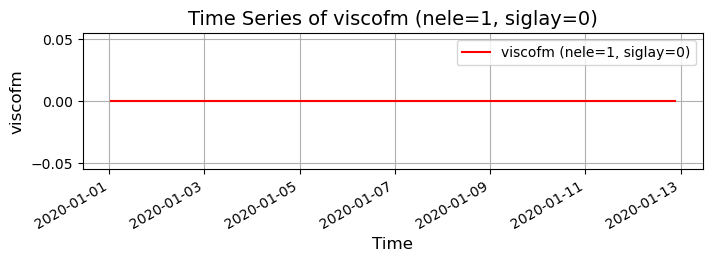

In [3]:
start=None; end=None
index=1  # node or nele number
k=0 # siglay or siglev number
plot_config = FvcomPlotConfig(width=8, height=2)
plotter = FvcomPlotter(ofc.ds, plot_config)
var_name = 'viscofm'
save_path = f"plot_{var_name}.png"
plotter.plot_timeseries(var_name, log=True, index=index, k=k,start=start, end=end, save_path=save_path)

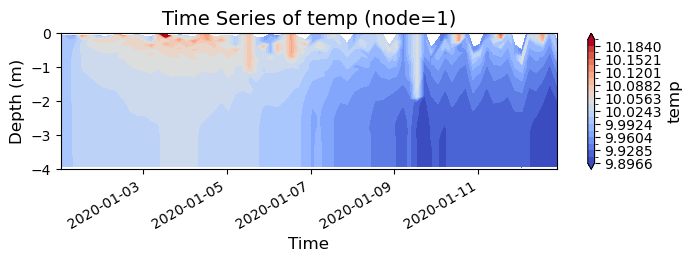

In [4]:
plotter = FvcomPlotter(ofc.ds, plot_config)
var_name = 'temp'
save_path = f"plot_{var_name}.png"
ax=plotter.plot_timeseries_2d(var_name, index=index, start=start, end=end, ylim=(-4,0), depth=True,
                              #levels=[9.8, 9.85, 9.9, 9.95, 10.0, 10.05, 10.1, 10.15],
                              rolling_window=0, cmap="coolwarm", vmin=None, vmax=10.2,
                              method='contourf', add_contour=False, label_contours=False,
                              save_path=save_path)

## Plot input netcdf files

In [5]:
indir = "~/Github/TB-FVCOM/goto_dye/input/input_steady/2020"
ncfiles = ["TokyoBay18_2020_wnd.nc","TokyoBay2020final_tsobc.nc", "TokyoBay2020julian_obc.nc",
           "TokyoBay2020kisarazufinal_sewer.nc", "TokyoBay2020final_river.nc",
           "TokyoBay2020final_sewer.nc"]
index_ncfiles=0
fvcom = FvcomDataLoader(base_path=indir, ncfile=ncfiles[index_ncfiles], time_tolerance=5)
fvcom.ds

Dataset loaded successfully from /home/teem/Github/TB-FVCOM/goto_dye/input/input_steady/2020/TokyoBay18_2020_wnd.nc


<xarray.Dataset> Size: 1GB
Dimensions:            (node: 3210, nele: 5645, three: 3, time: 8785,
                        dim_0: 5645, dim_1: 3)
Coordinates:
  * time               (time) datetime64[ns] 70kB 2020-01-01 ... 2021-01-01
Dimensions without coordinates: node, nele, three, dim_0, dim_1
Data variables: (12/20)
    x                  (node) float64 26kB ...
    y                  (node) float64 26kB ...
    lon                (node) float64 26kB 139.8 139.8 139.8 ... 139.9 139.8
    lat                (node) float64 26kB 35.65 35.65 35.65 ... 34.99 34.99
    xc                 (nele) float64 45kB ...
    yc                 (nele) float64 45kB ...
    ...                 ...
    long_wave          (time, node) float32 113MB ...
    relative_humidity  (time, node) float32 113MB ...
    air_pressure       (time, node) float32 113MB ...
    Precipitation      (time, node) float32 113MB ...
    nv_zero            (dim_0, dim_1) int32 68kB 1 0 2 0 ... 3207 3209 3208 3206
    nv_ccw             (nele, three) int32 68kB 2 0 1 2 ... 3209 3206 3208 3209
Attributes:
    type:                  FVCOM Forcing File
    title:                 FVCOM Forcing File
    institution:           Sasaki Lab, The University of Tokyo
    source:                FVCOM grid (unstructured) surface forcing
    history:               File created with write_FVCOM_forcing from the MAT...
    references:            http://fvcom.smast.umassd.edu, http://codfish.smas...
    Conventions:           CF-1.0
    infos:                 GWO atmospheric forcing data
    CoordinateSystem:      cartesian
    CoordinateProjection:  init=WGS84

In [6]:
start='2020-01-01'; end='2020-01-20'

In [7]:
plot_config = FvcomPlotConfig(width=8, height=2)
plotter = FvcomPlotter(fvcom.ds, plot_config)
var_name = 'elevation'
save_path = f"plot_{var_name}.png"
plotter.plot_timeseries(var_name, 1, start=start, end=end, save_path=save_path)

Error: the variable 'elevation' is not found in the dataset.


<Axes: title={'center': 'Wind Vector and Speed Time Series  (nele=0) with 25-hour Rolling Mean'}, xlabel='Time', ylabel='Wind Speed (m/s)'>

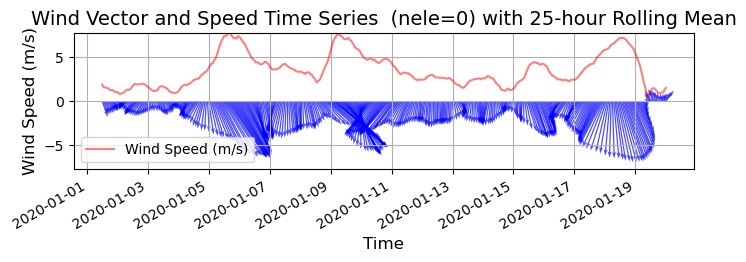

In [8]:
plot_config = FvcomPlotConfig(width=8, height=2)
plotter = FvcomPlotter(fvcom.ds, plot_config)
# ノード0の風速ベクトル時系列を2020年1月1日から12月31日までプロット
plotter.plot_wind_vector_timeseries(nele=0, start=start, end=end, rolling_window=25,
                                    save_path="wind_vector_plot.png"
                                   )

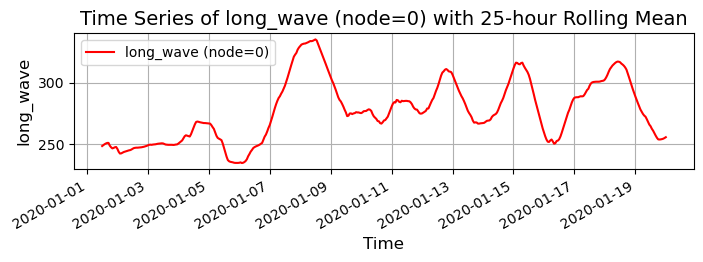

In [9]:
plot_config = FvcomPlotConfig(width=8, height=2)
plotter = FvcomPlotter(fvcom.ds, plot_config)
ax=plotter.plot_timeseries('long_wave', index=0, start=start, end=end, rolling_window=25)

In [10]:
analyzer=FvcomAnalyzer(fvcom.ds)
vars = analyzer.get_variables_by_dims(("time", "node"))
print(vars)

['air_temperature', 'cloud_cover', 'short_wave', 'long_wave', 'relative_humidity', 'air_pressure', 'Precipitation']


In [11]:
plot_config = FvcomPlotConfig(figsize=(8, 2))
plotter = FvcomPlotter(fvcom.ds, plot_config)

# HelperMixin のメソッドを利用
plotter.plot_timeseries_in_batches(
    plotter=plotter,
    vars=vars,
    index=0,
    batch_size=5,
    start=start,
    end=end,
    rolling_window=25,
    save_prefix="time_node"
)

Saved 2 figures as 'time_node_batch_#.png'.


In [12]:
vars = analyzer.get_variables_by_dims(("time", "nele"))
print(vars)

['uwind_speed', 'vwind_speed']


In [13]:
plot_config = FvcomPlotConfig(figsize=(8, 2))
plotter = FvcomPlotter(fvcom.ds, plot_config)

# HelperMixin のメソッドを利用
plotter.plot_timeseries_in_batches(
    plotter=plotter,
    vars=vars,
    index=0,
    batch_size=5,
    start=start,
    end=end,
    rolling_window=25,
    save_prefix="time_nele"
)

Saved 1 figures as 'time_nele_batch_#.png'.


In [14]:
plot_config = FvcomPlotConfig(figsize=(8, 2))
plotter = FvcomPlotter(fvcom.ds, plot_config)

plotter.plot_timeseries_for_river(
    var_name="river_flux",
    river_index=0,
    start=start,
    end=end,
    rolling_window=25,
    save_path="river_discharge.png"
)

Error: the variable 'river_flux' is not found in the dataset.


In [15]:
plot_config = FvcomPlotConfig(figsize=(8, 2))
plotter = FvcomPlotter(fvcom.ds, plot_config)
var_name='river_temp'
# HelperMixin のメソッドを利用
plotter.plot_timeseries_for_river_in_batches(
    plotter=plotter,
    var_name=var_name,
    batch_size=5,
    start=start,
    end=end,
    rolling_window=25,
    save_prefix=var_name
)

ERROR: No 'river_names' variable found.


## Example for input netcdf files

In [16]:
indir = "~/Github/TB-FVCOM/goto2023/input"
#indir = ""
ncfiles = ["TokyoBay_tsobc.nc", "TokyoBay_julian_obc.nc","TokyoBayfinal_river.nc", "TokyoBayfinal16_river.nc",
           "TokyoBay18_z0.nc", "TokyoBay18_wnd.nc",
           "TokyoBay2020final_sewer.nc"]
index_ncfiles=5
ifc = FvcomDataLoader(base_path=indir, ncfile=ncfiles[index_ncfiles], time_tolerance=5)
ifc.ds

Dataset loaded successfully from /home/teem/Github/TB-FVCOM/goto2023/input/TokyoBay18_wnd.nc


<xarray.Dataset> Size: 1GB
Dimensions:            (node: 3210, nele: 5645, three: 3, time: 8785,
                        dim_0: 5645, dim_1: 3)
Coordinates:
  * time               (time) datetime64[ns] 70kB 2020-01-01 ... 2021-01-01
Dimensions without coordinates: node, nele, three, dim_0, dim_1
Data variables: (12/20)
    x                  (node) float64 26kB ...
    y                  (node) float64 26kB ...
    lon                (node) float64 26kB 139.8 139.8 139.8 ... 139.9 139.8
    lat                (node) float64 26kB 35.65 35.65 35.65 ... 34.99 34.99
    xc                 (nele) float64 45kB ...
    yc                 (nele) float64 45kB ...
    ...                 ...
    long_wave          (time, node) float32 113MB ...
    relative_humidity  (time, node) float32 113MB ...
    air_pressure       (time, node) float32 113MB ...
    Precipitation      (time, node) float32 113MB ...
    nv_zero            (dim_0, dim_1) int32 68kB 1 0 2 0 ... 3207 3209 3208 3206
    nv_ccw             (nele, three) int32 68kB 2 0 1 2 ... 3209 3206 3208 3209
Attributes:
    type:                  FVCOM Forcing File
    title:                 FVCOM Forcing File
    institution:           Sasaki Lab, The University of Tokyo
    source:                FVCOM grid (unstructured) surface forcing
    history:               File created with write_FVCOM_forcing from the MAT...
    references:            http://fvcom.smast.umassd.edu, http://codfish.smas...
    Conventions:           CF-1.0
    infos:                 GWO atmospheric forcing data
    CoordinateSystem:      cartesian
    CoordinateProjection:  init=WGS84

## Compare with meteorological data
- Needs to install metdata; see [GitHub](https://github.com/jsasaki-utokyo/metdata)

In [17]:
from metdata import gwo

datetime_ini = "2020-01-01 00:00:00"
datetime_end = "2021-01-01 00:00:00"
stn = "Chiba"
base_path = "/mnt/c/dat/met/JMA_DataBase/GWO/Hourly/"

met = gwo.Hourly(datetime_ini=datetime_ini, datetime_end=datetime_end, stn=stn, dirpath=base_path)
met.df.head()  # pandas.DataFrame

Start datetime = 2020-01-01 00:00:00
End datetime = 2021-01-01 00:00:00
Reading from /mnt/c/dat/met/JMA_DataBase/GWO/Hourly/Chiba/Chiba2019.csv
Successful with no missing row.
Reading from /mnt/c/dat/met/JMA_DataBase/GWO/Hourly/Chiba/Chiba2020.csv
Successful with no missing row.
Reading from /mnt/c/dat/met/JMA_DataBase/GWO/Hourly/Chiba/Chiba2021.csv
Successful with no missing row.


,KanID,Kname,KanID_1,YYYY,MM,DD,lhpa,lhpaRMK,shpa,shpaRMK,...,humd,humdRMK,lght,lghtRMK,slht,slhtRMK,kous,kousRMK,u,v
2020-01-01 00:00:00,682,NaN,682,2019,12,31,1018.3,8,1019.1,8,...,-10.8,8,0.0,2,0.0,2,0.0,2,2.257832e+00,-5.450889
2020-01-01 01:00:00,682,NaN,682,2020,1,1,1019.3,8,1020.1,8,...,-10.1,8,0.0,2,0.0,2,0.0,2,1.377660e+00,-3.325966
2020-01-01 02:00:00,682,NaN,682,2020,1,1,1019.6,8,1020.4,8,...,-9.2,8,0.0,2,0.0,2,0.0,2,-4.041334e-16,-2.200000
2020-01-01 03:00:00,682,NaN,682,2020,1,1,1019.6,8,1020.4,8,...,-8.9,8,0.0,2,0.0,2,0.0,2,-8.419036e-01,-2.032535
2020-01-01 04:00:00,682,NaN,682,2020,1,1,1019.9,8,1020.7,8,...,-8.3,8,0.0,2,0.0,2,0.0,2,-2.571758e-16,-1.400000


In [18]:
met_ds = xr.Dataset.from_dataframe(met.df)
met_ds = met_ds.rename_dims({"index": "time"}).rename_vars({"index": "time"})
met_ds

<xarray.Dataset> Size: 2MB
Dimensions:  (time: 8785)
Coordinates:
  * time     (time) datetime64[ns] 70kB 2020-01-01 ... 2021-01-01
Data variables: (12/34)
    KanID    (time) int64 70kB 682 682 682 682 682 682 ... 682 682 682 682 682
    Kname    (time) float64 70kB nan nan nan nan nan nan ... nan nan nan nan nan
    KanID_1  (time) int64 70kB 682 682 682 682 682 682 ... 682 682 682 682 682
    YYYY     (time) int64 70kB 2019 2020 2020 2020 2020 ... 2020 2020 2020 2020
    MM       (time) int64 70kB 12 1 1 1 1 1 1 1 1 ... 12 12 12 12 12 12 12 12 12
    DD       (time) int64 70kB 31 1 1 1 1 1 1 1 1 ... 31 31 31 31 31 31 31 31 31
    ...       ...
    slht     (time) float64 70kB 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    slhtRMK  (time) int64 70kB 2 2 2 2 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2 2 2 2 2
    kous     (time) float64 70kB 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    kousRMK  (time) int64 70kB 2 2 2 2 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2 2 2 2 2
    u        (time) float64 70kB 2.258 1.378 -4.041e-16 ... 0.9899 0.6364 0.4243
    v        (time) float64 70kB -5.451 -3.326 -2.2 ... -0.9899 -0.6364 -0.4243

<Axes: title={'center': 'Wind Vector and Speed Time Series  with 1-hour Rolling Mean'}, xlabel='Time', ylabel='Wind Speed (m/s)'>

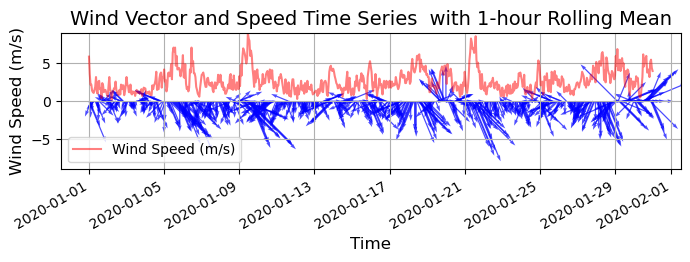

In [19]:
plot_config = FvcomPlotConfig(width=8, height=2)
plotter = FvcomPlotter(met_ds, plot_config)
start='2020-01-01'; end='2020-01-31'
plotter.plot_wind_vector_timeseries(u_var='u', v_var='v', nele=None, start=start, end=end, rolling_window=1,
                                    save_path="wind_vector_plot.png")

<Axes: title={'center': 'Wind Vector and Speed Time Series  (nele=0) with 1-hour Rolling Mean'}, xlabel='Time', ylabel='Wind Speed (m/s)'>

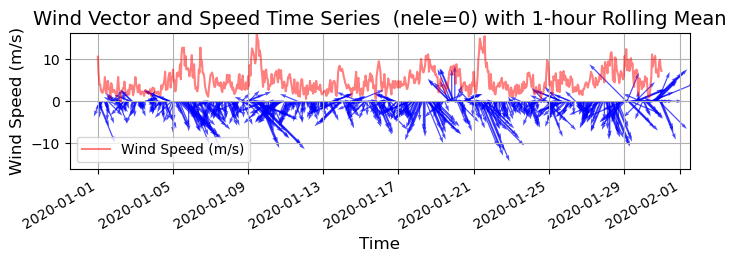

In [20]:
plot_config = FvcomPlotConfig(width=8, height=2)
plotter = FvcomPlotter(ifc.ds, plot_config)
# ノード0の風速ベクトル時系列を2020年1月1日から12月31日までプロット
plotter.plot_wind_vector_timeseries(nele=0, start=start, end=end, rolling_window=1,
                                    save_path="wind_vector_plot.png")